<a href="https://colab.research.google.com/github/leunco/Hands_On_MachineLearning/blob/main/2%EC%A3%BC%EC%B0%A8/%EA%B9%80%EB%8B%A4%EC%98%81/Chap4_%EB%AA%A8%EB%8D%B8_%ED%9B%88%EB%A0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

## Chap4. 모델 훈련
가장 간단한 모델 중 하나인 선형 회귀는 2가지 방법으로 훈련시킬 수 있다.
- 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터, 즉 훈련 세트에 대해 비용 함수를 최소화하는 모델 파라미터를 해석적으로 구한다.
- 경사 하강법(GD)이라고 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화시킨다. 그 결과 첫번째 방식과 동일한 파라미터로 수렴한다.

그 다음에는 비선형 데이터셋에도 훈련시킬 수 있는 더 복잡한 모델인 다항 회귀가 있다. 이 모델은 선형 회귀보다 파라미터가 많아서 훈련 데이터에 과대적합되기 더 쉽다. 따라서 학습 곡선을 사용하여 모델이 과대적합되었는지 감지하는 방법과 훈련 세트의 과대적합을 감소시킬 수 있는 몇가지의 규제 기법을 알아본다.

마지막으로 분류 작업에 널리 사용되는 모델인 로지스틱 회귀와 소프트맥스 회귀를 살펴본다.

## 4.1 선형 회귀
일반적인 선형 모델은 입력 특성의 가중치 합과 편향(절편)이라는 상수를 더하여 예측을 만든다.

$\hat y=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$
- $\hat y$: 예측값
- n: 특성의 수
- $x_i$: i번째 특성값
- $\theta_j$: j번째 모델 파라미터

이 식은 벡터 형태로 더 간단하게 쓸 수 있다.

$\hat y=h_\theta(𝐱)=𝜽𝐱$
- 𝜽: 편향 $\theta_0$와 $\theta_1,...,\theta_n$까지의 특성 가중치를 담은 모델의 파라미터 벡터
- 𝐱: $x_0$에서 $x_n$까지 담은 샘플의 특성 벡터, $x_0$는 항상 1
- 𝜽𝐱: 벡터 𝜽와 𝐱의 점곱, $\theta_0x_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n$
- $h_\theta$: 모델 파라미터 𝜽를 사용한 가설 함수

이 선형 회귀 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해서는 먼저 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정해야 한다.

2장에서 **회귀**에 가장 널리 사용되는 성능 측정 지표는 **평균 제곱근 오차 RMSE**라고 언급했다. 따라서 선형 회귀 모델을 훈련시키려면 RMSE를 최소화하는 𝜽를 찾아야한다. 실제로는 평균 제곱 오차 MSE를 최소화하는 것이 같은 결과를 내면서 더 간단하다.

훈련 세트 $𝐗$에 대한 선형 회귀 가설 $h_\theta$의 MSE는 다음과 같이 계산한다.

> ***선형 회귀 모델의 MSE 비용 함수***

$MSE(𝐗,h_\theta)=\frac{1}{m}\sum_{i=1}^m(𝜽^T𝐱^{(i)}-y^{(i)})^2$

### 4.1.1 정규방정식
**비용 함수를 최소화하는 𝜽 값을 찾기 위한 해석적인 방법**, 즉 결과를 얻을 수 있는 수학 공식이 있는데 이를 **정규방정식**이라고 한다.

$\hat{𝜽}=(𝐗^T𝐗)^{-1}𝐗^T𝒚$
- $\hat{𝜽}$: 비용 함수를 최소화하는 𝜽 값
- $𝒚$: $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타겟 벡터

이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성한다. 그리고 정규방정식을 사용하여 $\hat{𝜽}$를 계산한다.

먼저 모든 샘플에 $x_0=1$을 추가한다. 그리고 넘파이 선형대수 모듈인 `np.linalg`에 있는 `inv()` 함수를 사용하여 역행렬을 계산하고, `dot()` 메서드를 사용하여 행렬 곱셈을 한다.

이 데이터를 생성하기 위해 사용한 함수는 $y=4+3x_1+$가우시안 잡음이다. 정규방정식으로 계산한 결과 기대한 4와 3에 근접하지만 잡음 때문에 정확하게 재현하지는 못하였다.

In [ ]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

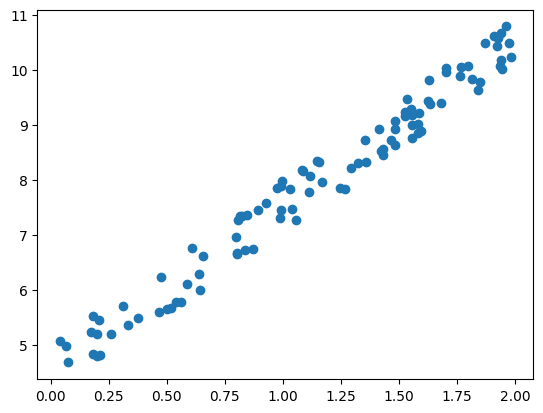

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.show()

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.5211885 ],
       [2.99429768]])

사이킷런에서 선형 회귀를 간단하게 수행할 수 있다. `fit()` 메서드를 이용하여 훈련시키면 된다.

그리고 훈련된 모델에 `intercept_` 인스턴스를 사용하면 절편을,
`coef_` 인스턴스를 사용하면 회귀 계수를 확인할 수 있다.

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수를 기반으로 한다.

따라서 `scipy.linalg.lstsq()` 함수를 직접 호출하여 구한 회귀 계수 값은 동일하게 나타난다.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([4.5211885]), array([[2.99429768]]))

In [ ]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.5211885 ],
       [2.99429768]])

`scipy.linalg.lstsq()` 함수는 $\hat{𝜽}=𝐗^+𝒚$를 계산하는데, $𝐗^+$는 $𝐗$의 **유사역행렬**이다. `np.linalg.pinv()` 함수를 사용하면 유사역행렬을 직접 구할 수 있다.

함수를 이용하지 않고 직접 유사역행렬을 구하여 $\hat{𝜽}=𝐗^+𝒚$ 식으로 계산한 값도 앞의 결과와 동일하다.

유사역행렬 자체는 **특이값 분해(SVD)**라고 부르는 표준 행렬 분해 기법을 사용하여 계산된다.

정규방정식은 m<n이거나, 어떤 특성이 중복되어 행렬 $𝐗^T𝐗$의 역행렬이 없는 특이 행렬이라면 작동하지 않는다. 그러나 유사역행렬은 항상 구할 수 있으므로 정규방정식을 계산하는 것보다 더 효율적이다.

In [ ]:
np.linalg.pinv(X_b).dot(y)

array([[4.5211885 ],
       [2.99429768]])

### 4.1.2 계산 복잡도
정규방정식은 특성수가 n개일 때 (n+1)x(n+1) 크기가 되는 $𝐗^T𝐗$의 역행렬을 계산한다. 역행렬을 계산하는 계산 복잡도는 일반적으로 $𝘖(n^{2.4})$에서 $𝘖(n^3)$ 사이이다.

사이킷런의 `LinearRegression` 클래스가 사용하는 SVD 방법은 약 $𝘖(n^2)$로, 특성의 개수가 2배로 늘어나면 계산 시간이 약 4배가 된다.

또한 정규방정식이나 다른 알고리즘으로 학습된 선형 회귀 모델은 예측이 매우 빠르다. 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 즉 예측하려는 샘플이나 특성 수가 2배로 늘어나면 걸리는 시간도 거의 2배가 증가한다.

## 4.2 경사 하강법
**경사 하강법**(GD)은 여러 종류의 문제에서 최적의 해법을 찾을 수 있는 일반적인 최적화 알고리즘이다. 경사 하강법의 기본 아이디어는 **비용 함수를 최소화하기 위해 반복해서 파라미터를 조정**해가는 것이다.

파라미터 벡터 $𝜽$에 대해 비용 함수의 현재 그래디언트(gradient)를 계산한다. 그리고 **그래디언트가 감소하는 방향**으로 진행하다가, **0이 되면 최솟값**에 도달한 것이다.

구체적으로는 임의의 초기값으로 $𝜽$를 시작하는 무작위 초기화를 진행하며 한번에 조금씩 비용 함수가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때까지 점진적으로 향상시킨다.

경사 하강법에서 중요한 파라미터는 스텝의 크기로, **학습률** `learning rate` 하이퍼파라미터로 결정된다.

학습률이 **너무 작으면** 알고리즘이 **수렴하기 위해 반복을 많이 진행**해야 하므로 시간이 오래 걸린다.

반면 학습률이 **너무 크면** 비용 함수에서 이전보다 더 높은 곳으로 올라가게 될지도 모른다. 이는 알고리즘을 **더 큰 값으로 발산**하게 만들어서 적절한 해법을 찾지 못하게 한다.

경사 하강법의 문제점은 무작위 초기화 때문에 알고리즘이 어느 값에서 시작하는지에 따라 전역 최솟값보다 **덜 좋은 지역 최솟값에 수렴**하거나, 비용 함수가 너무 평탄한 지역을 지나면 시간이 오래 걸려서 **일찍 멈추게 되어 전역 최솟값에 도달하지 못한다**는 것이다.

다행히 선형 회귀를 위한 MSE 비용 함수는 곡선에서 어떤 두 점을 선택하여 선을 그어도 곡선을 가로지르지 않는 **볼록 함수**이다. 이는 지역 최솟값이 없고 **하나의 전역 최솟값**만 있으며, **연속**된 함수이고 기울기가 갑자기 변하지 않는다.

이 두가지 사실로부터 경사 하강법이 전역 최솟값에 가깝게 접근할 수 있다는 것을 보장한다.

### 4.2.1 배치 경사 하강법
경사 하강법을 구현하려면 각 모델 파라미터 $\theta_j$에 대해 **비용 함수의 그래디언트**를 계산해야 한다. 즉 $\theta_j$가 조금 변경될 때 **비용 함수가 얼마나 바뀌는지** 계산해야 하는데, 이를 **편도함수**라고 한다.

> ***비용 함수의 편도함수***

$\frac{\partial}{\partial \theta_j}$MSE$(\theta)=\frac{2}{m}\sum_{i=1}^m(𝜽^T𝐱^{(i)}-y^{(i)})x_j^{(i)}$

비용 함수의 그래디언트 벡터는 모델 파라미터마다 한 개씩인 비용 함수의 편도함수를 하나로 모두 담고 있다.

> ***비용 함수의 그래디언트 벡터***

$\Delta_{\theta}$MSE$(\theta)=\begin{pmatrix}
\frac{\partial}{\partial \theta_0}MSE(\theta) \\
\frac{\partial}{\partial \theta_1}MSE(\theta) \\
... \\
\frac{\partial}{\partial \theta_n}MSE(\theta)
\end{pmatrix}=\frac{2}{m}𝐗^T(𝐗𝜽-y)$

이 공식은 **매 경사 하강법 스텝에서 전체 훈련 세트 $X$에 대해 계산**하므로, 이 알고리즘을 배치 경사 하강법이라고 한다. 즉 **매 스텝에서 훈련 데이터 전체를 사용**하는 것이다. 그렇기 때문에 매우 큰 훈련 세트에서는 알고리즘이 매우 느리다.

그러나 경사 하강법은 특성 수에 민감하지 않으므로 특성이 수십만 개일 때 선형 회귀를 훈련시키려면 정규방정식이나 SVD보다 경사 하강법을 사용하는 편이 훨씬 빠르다.

위로 향하는 그래디언트 벡터가 구해지면 반대 방향인 아래로 가야한다. 즉 $𝜽$에서 $\Delta_{\theta}$MSE$(\theta)$를 빼야한다는 뜻이다. 이때 학습률 $\eta$가 사용되는데, 내려가는 스텝의 크기를 결정하기 위해 그래디언트 벡터에 $\eta$를 곱한다.

> ***경사 하강법의 스텝***

$\theta^*=\theta-\eta\Delta$MSE$(\theta)$

이 알고리즘을 코드로 간단하게 구현하여 $𝜽$를 구해보면 정규방정식으로 찾은 것과 정확하게 동일하다.

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2, 1) #무작위 초기화

for iter in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta * gradients

theta

array([[4.5211885 ],
       [2.99429768]])

다음 그림은 3가지의 다른 학습률을 사용하여 진행한 경사 하강법의 스텝 처음 10개이다.
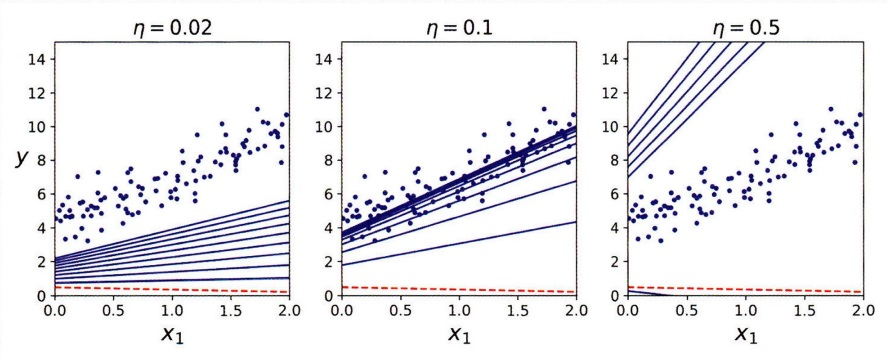

- 왼쪽은 학습률이 너무 낮다. 따라서 알고리즘은 최적점에 도달하겠지만 시간이 오래 걸릴 것이다.
- 가운데는 학습률이 적당해보이며, 반복 몇 번 만에 이미 최적점에 수렴했다.
- 오른쪽은 학습률이 너무 높다. 알고리즘이 이리저리 널뛰면서 스텝마다 최적점에서 더 멀어지며 발산한다.

적절한 학습률을 찾으려면 그리드 탐색을 사용한다. 그러나 수렴하는데 너무 오래 걸리는 모델을 막기 위해서 반복 횟수를 제한해야 한다.

반복 횟수가 너무 **작으면 최적점에 도달하기 전에 알고리즘이 멈춘다**. 반대로 반복 횟수가 너무 **크면** 모델 파라미터가 더는 변하지 않는 동안 **시간을 낭비**하게 된다.

간단한 해결책은 반복 횟수를 아주 크게 지정하고 그래디언트 벡터가 아주 작아지면, 즉 벡터의 노름이 어떤 허용오차 값 $ɛ$보다 작아지면 경사 하강법이 거의 최솟값에 도달한 것이므로 알고리즘을 중지하는 것이다.


### 4.2.2 확률적 경사 하강법
**배치 경사 하강법**의 가장 큰 문제는 **매 스텝에서 전체 훈련 세트를 사용하여 그래디언트를 계산**한다는 것이다. 따라서 훈련 세트가 커지면 매우 느려지게 된다.

이와는 정반대로 **확률적 경사 하강법**은 **매 스텝에서 한 개의 샘플을 무작위로 선택**하고, 그 **하나의 샘플에 대한 그래디언트를 계산**한다. 매 반복에서 다뤄야 할 데이터가 매우 적기 때문에 한번에 하나의 샘플을 처리하면 확실히 알고리즘이 더 빠르다.

반면에 **확률적, 즉 무작위**이기 때문에 **확률적 경사 하강법은** 배치 경사 하강법보다 훨씬 **불안정하다**. **비용 함수가** 최솟값에 다다를 때까지 부드럽게 감소하지 않고, **위아래로 요동**치면서 평균적으로 감소한다.

시간이 지나면 최솟값에 매우 근접하겠지만 요동이 지속되면서 **최솟값에 안착하지는 못할 것**이다. 알고리즘이 멈출 때 좋은 파라미터가 구해지겠지만 **최적치는 아니다**.

**무작위성**은 **지역 최솟값에서 탈**출시켜줘서 좋지만, 알고리즘을 **전역 최솟값에 다다르지 못하게 한다**는 점에서 좋지 않다.

이 딜레마를 해결하는 한가지 방법은 **학습률을 점진적으로 감**소시키는 것이다. 시작할 때는 학습률을 크게 하여 수렵을 빠르게 하고 지역 최솟값에 빠지지 않게 한다. 그리고 점차 학습률을 작게 줄여서 알고리즘이 전역 최솟값에 도달하게 한다.

**매 반복에서 학습률을 결정하는 함수**를 **학습 스케쥴**이라고 한다.

학습률이 너무 빨리 줄어들면 지역 최솟값에 갇히거나 최솟값까지 가는 중간에 멈춰버릴 수도 있다. 반대로 학습률이 너무 천천히 줄어들면 오랫동안 최솟값 주변을 맴돌거나 훈련을 너무 일찍 중지하여 지역 최솟값에 머무를 수 있다.

In [ ]:
n_epochs = 50
t0, t1 = 5, 50
theta = np.random.randn(2, 1)

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_b[random_idx:random_idx+1]
        yi = y[random_idx:random_idx+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

theta

array([[4.48481293],
       [3.02187568]])

위의 코드는 간단한 학습 스케줄을 사용한 확률적 경사 하강법의 구현이다.

일반적으로 한 **반복**에서 m번 되풀이되고, 이때 각 반복을 **에포크**라고 한다. 배치 경사 하강법 코드가 전체 훈련 세트에 대해 1000번 반복하는 동안, 이 코드는 훈련 세트에서 50번만 반복하고도 매우 좋은 값에 도달했다.

샘플을 무작위로 선택하기 때문에 어떤 샘플은 하나의 에포크에서 여러번 선택될 수도 있고, 어떤 샘플은 전혀 선택되지 못할 수도 있다. 알고리즘이 에포크마다 모든 샘플을 사용하게 하려면 훈련 세트를 섞은 후 차례대로 하나씩 선택하고 다음 에포크에서 다시 섞는 식의 방법을 사용할 수 있다.

사이킷런에서 확률적 경사 하강법(SGD) 방식으로 선형 회귀를 사용하려면 기본값으로 제곱 오차 비용 함수를 최적화하는 `SGDRegressor` 클래스를 사용한다.

다음 코드는 `max_iter`를 1000으로 지정하였으므로 최대 1000번 에포크 동안 실행된다. 또는 `tol=1e-3`이므로 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행된다. `eta`는 0.1이므로 학습률이 0.1이고, `penalty`는 따로 지정하지 않았으므로 규제는 사용하지 않는다.

사이킷런의 `SGDRegressor` 클래스로도 정규방정식으로 구한 것과 매우 비슷한 값을 얻을 수 있다.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.47538043]), array([2.99957727]))

### 4.2.3 미니배치 경사 하강법
**미니배치 경사 하강법**은 **미니배치**라고 부르는 **임의의 작은 샘플 세트에 대해 그래디언트를 계산**한다.

확률적 경사 하강법에 비해 미니배치 경사 하강법의 주요 장점은 행렬 연산에 최적화된 하드웨어, 특히 GPU를 사용해서 얻는 성능 향상이다.

특히 미니배치를 어느 정도 크게 하면 이 알고리즘은 파라미터 공간에서 확률적 경사 하강법보다 **덜 불규칙**하게 움직인다. 결국 미니배치 경사 하강법이 **확률적 경사 하강법보다 최솟값에 더 가까이 도달**하게 된다.

다음 그림은 3가지의 경사 하강법 알고리즘이 훈련 과정 동안 파라미터 공간에서 움직인 경로이다.

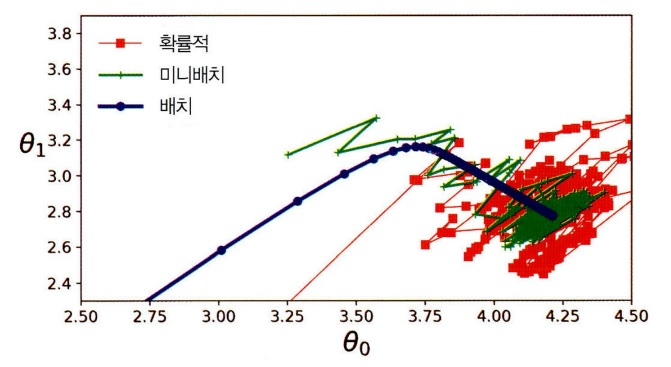

모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 **실제로 최솟값에서 멈춘** 반면, 확률적 경사 하강법과 미니배치 경사 하강법은 **최솟값 근처에서 맴돌고** 있다.

하지만 배치 경사 하강법은 매 스텝에서 많은 시간이 소요되고, 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케줄을 사용하면 최솟값에 도달할 수 있다.

다음 표는 지금까지 논의한 알고리즘을 선형 회귀를 사용하여 비교한 것이다.

여기서 m은 훈련 샘플 수, n은 특성 수를 의미한다.

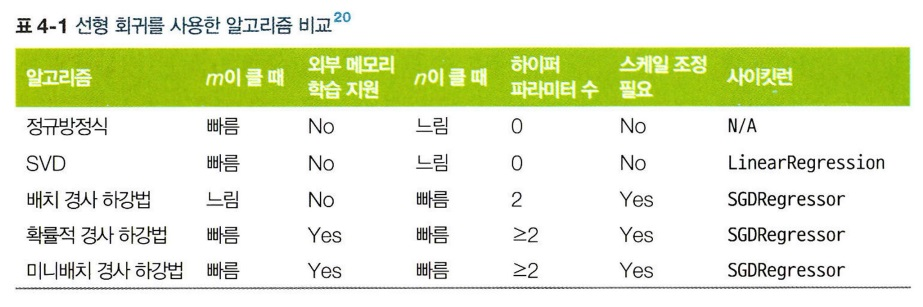

## 4.3 다항 회귀
비선형 데이터를 학습할 때에도 선형 모델을 사용할 수 있다. 간단한 방법으로는 **각 특성의 거듭제곱을 새로운 특성으로 추가**하고, 이 확장된 특성을 포함한 데이터셋에 선형 모델을 훈련시키는 것이다. 이런 방법을 **다항 회귀**라고 한다.

예를 들어 간단한 2차방정식으로 약간의 잡음을 포함한 비선형 데이터를 생성한다.

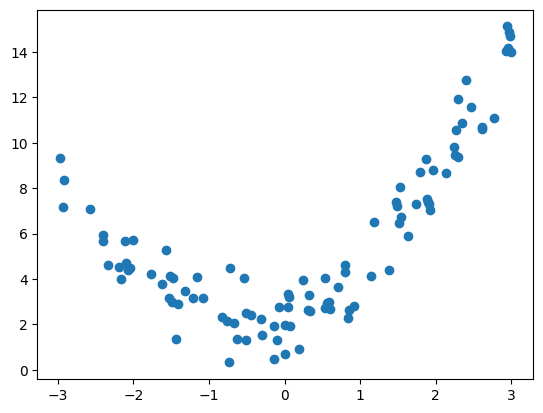

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 + X**2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

이 비선형 데이터에 직선은 잘 맞지 않을 것이므로, 훈련 세트에 있는 각 특성을 제곱하여 새로운 특성으로 추가하기 위해 사이킷런의 `PolynomialFeatures`를 사용하여 훈련 데이터를 변환한다.

`PolynomialFeatures`에 추가하고 싶은 항의 차수를 `degree`로 지정하고, 해당 데이터에 `fit_transform()`을 적용하면 새로운 열이 추가된다.

여기서는 2차, 즉 제곱 항을 추가한다. 이렇게 확장된 훈련 데이터에 `LinearRegression`을 적용한다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([0.80476347]), array([0.80476347, 0.64764424]))

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.38637976]), array([[0.980824 , 1.0325775]]))

만약 특성이 여러 개라면 다항 회귀는 이 특성들 사이의 관계를 찾을 수 있다. `PolynomialFeatures`가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문이다.

예를 들어 2개의 특성 a, b가 있을 때, `degree=3`으로 `PolynomialFeatures`를 적용하면 $a^2, a^3, b^2, b^3$뿐만 아니라 $ab, a^2b, ab^2$도 특성으로 추가한다.

## 4.4 학습 곡선
모델의 일반화 성능을 추정하기 위해 교차 검증을 사용할 수 있다. 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과대적합된 것이고, 양쪽에서 모두 좋지 않다면 과소적합된 것이다.

또 다른 방법으로 **학습 곡선**을 살펴볼 수 있다. 학습 곡선은 **훈련 세트와 검증 세트의 모델 성능을 훈련 세트 크기의 함수**로 나타낸다. 이 그래프를 생성하기 위해서는 단순히 **훈련 세트에서 크기가 다른 서브 세트를 만들어서 모델을 여러번 훈련**시키면 된다.

다음의 코드는 주어진 훈련 데이터에서 모델의 학습 곡선을 그리는 함수를 정의한 것이다.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation set')
    plt.xlabel('train set size')
    plt.ylabel('RMSE')
    plt.legend()

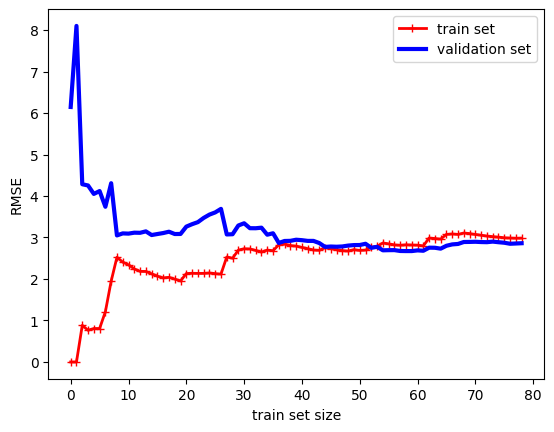

In [ ]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

위 그래프는 단순 선형 회귀 모델의 학습 곡선을 나타낸 것이다. 이 모델은 **과소적합**된 모델이다.

먼저 훈련 데이터의 성능(빨간색)을 확인한다.
- 훈련 데이터는 0에서 시작하므로 훈련 세트에 하나 혹은 2개의 샘플이 있을 땐 모델이 완벽하게 작동한다.
- 그러나 샘플이 추가됨에 따라 잡음과 비선형이기 때문에 모델이 훈련 데이터를 완벽하게 학습하지 못하므로, 곡선이 어느 정도 평평해질 때까지 오차가 계속 상승한다.
- 이 정도 지점에서는 훈련 세트에 샘플이 추가되어도 평균 오차가 크게 나빠지거나 좋아지지 않는다.

다음으로 검증 데이터의 성능(파란색)을 확인한다.
- 모델이 적은 수의 훈련 세트로 훈련될 때는 제대로 일반화될 수 없으므로 초기의 검증 오차가 매우 크다.
- 훈련 세트가 추가됨에 따라 모델이 제대로 학습이 되어 검증 오차가 점점 감소한다.
- 하지만 선형 회귀의 직선은 데이터를 잘 모델링할 수 없으므로 오차의 감소가 완만해지면서 훈련 세트의 그래프와 가까워진다.

이 그래프가 전형적인 과소적합 모델의 학습 곡선이다. 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다.

In [ ]:
def plot_learning_curve2(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict[:m]))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train set')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='validation set')
    plt.xlabel('train set size')
    plt.ylabel('RMSE')
    plt.ylim((0,5))
    plt.legend()

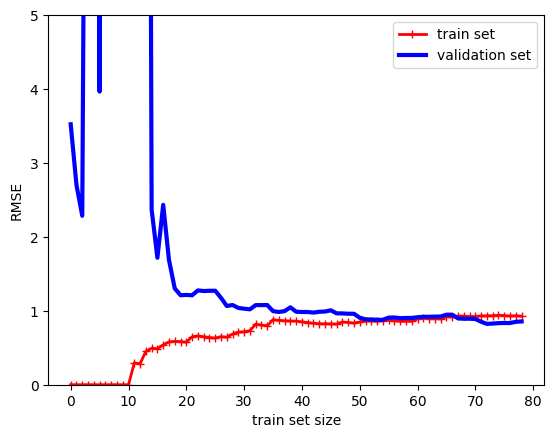

In [ ]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curve2(polynomial_regression, X, y)

위 그래프는 같은 데이터에 대하여 10차 다항 회귀의 학습 곡선을 그린 것이다.

단순 선형 회귀의 학습 곡선과 비교했을 때 2가지의 중요한 차이점이 있다.
- 훈련 데이터의 오차(1 이하)가 선형 회귀 모델(3 이하)보다 훨씬 낮다.
- 두 곡선 사이에 공간이 존재한다. 이는 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 낫다는 뜻으로, 과대적합 모델의 특징이다. 그러나 더 큰 훈련 세트를 사용하면 두 곡선이 점점 가까워질 것이다.

> ***편향/분산 트레이드오프***

통계학과 머신러닝에서 나온 중요한 이론 하나는 **모델의 일반화 오차를 3가지 다른 종류의 오차의 합으로 표현**할 수 있다는 것이다.

**1. 편향**
- 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다. 예를 들어 데이터가 실제로는 2차인데 선형으로 가정하는 경우이다.
- **편향이 큰 모델은 훈련 데이터에 과소적합되기 쉽다.**

**2. 분산**
- 분산은 훈련 데이터에 있는 작은 변동에 모델이 과도하게 민감하기 때문에 나타난다.
- 고차 다항 회귀 모델 같은 **자유도가 높은 모델이 높은 분산**을 가지기 쉬워서 **훈련 데이터에 과대적합되는 경향**이 있다.

**3. 줄일 수 없는 오차**
 - 줄일 수 없는 오차는 데이터 자체에 있는 잡음 때문에 발생한다. 이 오차를 줄일 수 있는 유일한 방법은 데이터에서 잡음을 제거하는 것이다.

모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향이 줄어든다. 반대로 모델의 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 따라서 이를 트레이드오프라고 한다.


## 4.5 규제가 있는 선형 모델
**과대적합을 감소**시키는 좋은 방법은 모델을 규제하는 것, 즉 **모델을 제한**하는 것이다.

자유도를 줄이면 데이터에 과대적합되기 더 어려워진다. 다항 회귀 모델을 규제하는 간단한 방법은 다항식의 차수를 감소시키는 것이다.

**선형 회귀** 모델에서는 보통 **모델의 가중치를 제한**함으로써 규제를 가한다. 각기 다른 방법으로 가중치를 제한하는 '릿지' 회귀, '라쏘' 회귀, 엘라스틱넷이 있다.

### 4.5.1 릿지 회귀
**릿지(Ridge) 회귀**는 **규제가 추가된 선형 회귀** 버전이다. 규제항 $\alpha\sum_{i=1}^n\theta_i^2$이 **비용 함수에 추가**된다.

이는 학습 알고리즘을 데이터에 맞추는 것뿐만 아니라, 모델의 가중치가 가능한 작게 유지되도록 노력한다. 규제항은 **훈련하는 동안에만** 비용 함수에 추가된다. 모델의 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.

하이퍼파라미터 $\alpha$는 모델을 얼마나 많이 규제할지 조절한다. **$\alpha=0$이면 릿지 회귀는 선형 회귀와 같아진다**. $\alpha$가 아주 크면 모든 가중치가 거의 0에 가까워지고, 결국 데이터의 평균을 지나는 수평선이 된다.

> ***릿지 회귀의 비용 함수***

$J(\theta)=MSE(\theta)+\alpha\frac{1}{2}\sum_{i=1}^n\theta_i^2$

$𝐰$를 특성의 가중치 벡터$(\theta_1,...,\theta_n)$라고 하면 규제항은 $\frac{1}{2}(||𝐰||_2)^2$와 같다. 즉 **가중치 벡터의 $l_2$ 노름의 제곱을 2로 나눈 것**을 더하는 것이다. 편향 $\theta_0$는 규제되지 않으므로 i=1부터 시작한다.

릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 수행하기 전에 `StandardScaler` 등을 사용하여 데이터의 스케일을 맞추는 것이 중요하다. 이는 규제가 있는 대부분의 모델이 마찬가지이다.

선형 회귀와 마찬가지로 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고, 경사 하강법을 사용할 수도 있다.

> ***릿지 회귀의 정규방정식***

$\hat{𝜽}=(𝐗^T𝐗+\alpha 𝐀)^{-1}𝐗^T𝒚$

다음은 사이킷런에서 정규방정식을 사용한 릿지 회귀를 적용하는 예시이다. 이때 `solver='cholesky'`로 적용하면, 안드레 루이 숄레스키가 발견한 행렬 분해를 사용하여 위의 정규방정식을 변형한 방정식을 사용한다.

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[7.25308357]])

`SGDRegressor`로 확률적 경사 하강법을 사용할 수도 있다. `penalty` 매개변수는 사용할 규제를 지정한다.

`l2`는 SGD가 비용 함수에 가중치 벡터의 $l_2$ 노름의 제곱을 2로 나눈 규제항을 추가하게 만든다. 즉 릿지 회귀와 동일하다.

In [ ]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([7.25514254])

### 4.5.2 라쏘 회귀
**라쏘(Lasso) 회귀**는 선형 회귀의 또 다른 규제된 버전이다.

릿지 회귀처럼 비용 함수의 규제항을 더하지만, $l_2$ 노름의 제곱을 2로 나눈 것 대신에 **가중치 벡터의 $l_1$ 노름을 사용**한다.

> ***라쏘 회귀의 비용 함수***

$J(\theta)=MSE(\theta)+\alpha\sum_{i=1}^n|\theta_i|$

라쏘 회귀의 중요한 특징은 **덜 중요한 특성의 가중치를 제거하려고 한다**는 점이다. 즉 덜 중요한 특성의 가중치가 0이 된다.

다시 말해 라쏘 회귀는 **자동으로 특성 선택**을 하고, **희소 모델을 만든다**. 즉 0이 아닌 특성의 가중치가 적다.

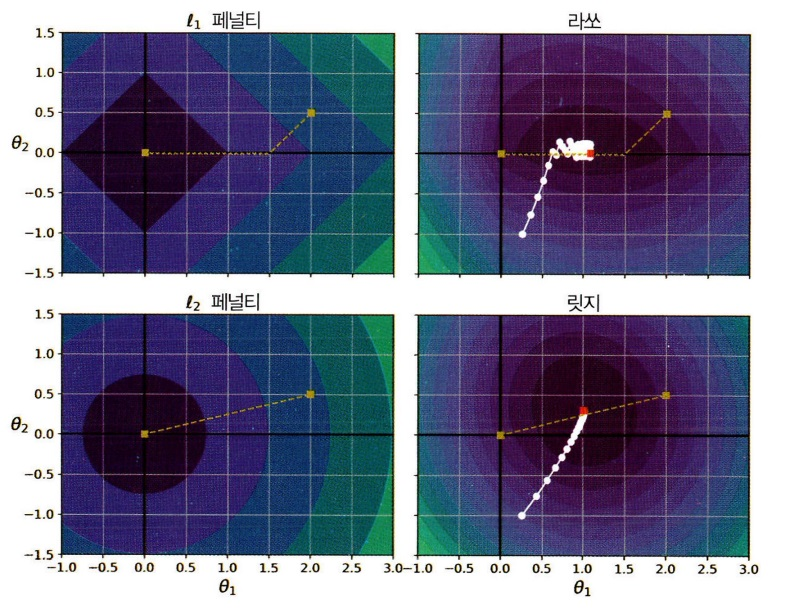

다음 그림의 두 축은 모델 파라미터 2개를 나타내고, 배경의 등고선은 각기 다른 손실 함수를 나타낸다. 첫번째 행은 라쏘 회귀, 두번째 행은 릿지 회귀이다. 이 그림에서 규제가 없는 MSE의 최적 파라미터는 $\theta_1=2, \theta_2=0.5$이다.

왼쪽 위 그래프의 등고선은 $l_1$ 손실 $(|\theta_1|+|\theta_2|)$를 나타낸다. 파라미터의 임의의 초기값에서 경사 하강법을 실행하면 두 파라미터가 노란 점선처럼 동일하게 감소될 것이다. 그림에서는 $\theta_1=2, \theta_2=0.5$로 초기화했으며, 시작할 때 0에 더 가까운 $\theta_2$가 먼저 0에 도달한다. 그 다음 경사 하강법이 $\theta_1=0$에 도달할 때까지 축을 따라 내려간다. $l_1$의 그래디언트는 0에서 정의되지 않으므로 약간의 진동이 있다.

오른쪽 위 그래프의 등고선은 $l_1$ 손실을 더한 MSE 손실 함수, 즉 라쏘 회귀의 비용 함수를 나타낸다. 하얀 작은 원으로 경사 하강법이 $\theta_1=0.25, \theta_2=-1$로 초기화된 모델 파라미터를 최적화하는 과정을 보여준다. 여기서도 $\theta_2=0$으로 빠르게 줄어들고, 그 다음 축을 따라 진동하면서 전역 최적점인 빨간 사각형에 도달한다.

$\alpha$가 증가하면 전역 최적점이 노란 점선을 따라 왼쪽으로 이동하고, $\alpha$가 감소하면 오른쪽으로 이동한다.

아래 2개의 그래프도 동일하지만 $l_2$ 페널티를 사용한다.

왼쪽 아래 그래프에서 $l_2$ 손실은 원점에 가까울수록 줄어드는 것을 볼 수 있다. 따라서 경사 하강법이 원점까지 노란 직선 경로를 따라서 간다.

오른쪽 아래 그래프의 등고선은 $l_2$ 손실을 더한 MSE 손실 함수, 즉 릿지 회귀의 비용 함수를 나타낸다. 이 그래프가 라쏘와 다른 점은 크게 2가지이다. 1. 파라미터가 전역 최적점에 가까워질수록 그래디언트가 작아진다. 따라서 경사 하강법이 자동으로 느려지고, 진동이 없으므로 수렴에 도움이 된다. 2. $\alpha$를 증가시킬수록 최적의 파라미터가 원점에 더 가까워진다. 그러나 완전히 0이 되지는 않는다.

사이킷런은 라쏘 회귀를 위해 `Lasso` 클래스를 제공한다.

또한 `SGDRegressor`로 확률적 경사 하강법을 사용할 수도 있다. 이때 `penalty` 매개변수에 `l1` 규제를 지정하면 된다.

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([7.21429142])

In [ ]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([7.23884947])

### 4.5.3 엘라스틱넷
**엘라스틱넷**(Elastic net)은 **릿지 회귀와 라쏘 회귀를 절충**한 모델이다.

규제항은 릿지와 라쏘의 규제항을 단순히 더해서 사용하며, 혼합 정도는 혼합 비율 r을 사용하여 조절한다. 엘라스틱넷은 r=0이면 릿지 회귀와 같고, r=1이면 라쏘 회귀와 같다.

> ***엘라스틱넷 비용 함수***

$J(\theta)=MSE(\theta)+r\alpha\sum_{i=1}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{i=1}^n\theta_i^2$



규제가 없는 보통의 선형 회귀, 릿지 회귀, 라쏘 회귀, 엘라스틱넷은 때에 따라 적절하게 사용해야 한다.

적어도 약간의 규제가 있는 것이 대부분의 경우에 좋으므로 일반적으로 평범한 선형 회귀는 피하는 것이 좋다.

**릿지 회귀가 기본**이 되지만, **사용되는 특성이 몇 개뿐**이라고 의심되면 **라쏘 회귀나 엘라스틱넷**이 낫다. 이 모델들은 불필요한 특성의 가중치를 0으로 만들어 주기 때문이다.

**특성 수가 훈련 샘플 수보다 많거나 특성 몇 개가 강하게 연관**되어 있을 때에는 보통 라쏘 회귀가 문제를 일으키므로 **엘라스틱넷을 더 선호**한다.

사이킷런의 `ElasticNet`을 사용하여 엘라스틱넷을 구현할 수 있다. 매개변수 `l1_ratio`는 혼합 비율 r을 의미한다.

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([7.20769885])

### 4.5.4 조기 종료
경사 하강법과 같은 반복적인 학습 알고리즘을 규제하는 색다른 방식은 **검증 에러가 최솟값에 도달하면 바로 훈련을 중지**시키는 것으로, 이를 **조기 종료**라고 한다.

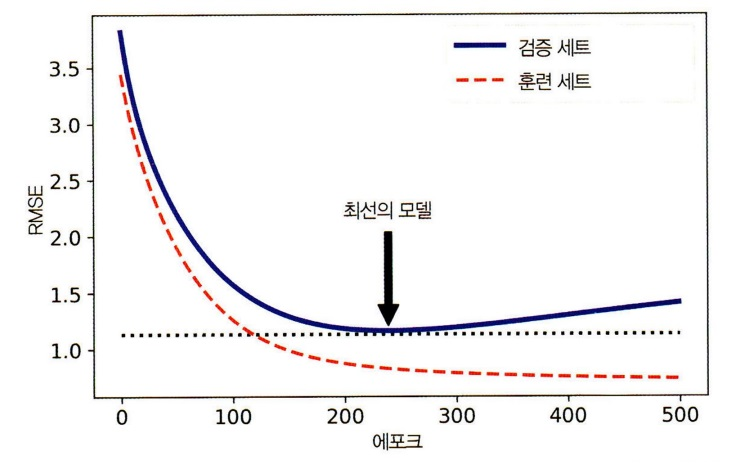

다음 그림은 배치 경사 하강법으로 훈련시킨 복잡한 모델에 관한 것이다. 에포크가 진행됨에 따라 알고리즘이 점차 학습되어 훈련 세트에 대한 예측 에러(RMSE)와 검증 세트에 대한 예측 에러가 줄어든다.

그러나 **감소하던 검증 에러가 멈췄다가 다시 상승**하게 되는데, 이는 모델이 훈련 데이터에 **과대적합되기 시작**하는 것을 의미한다.

조기 종료는 검증 에러가 다시 증가하기 전, 최소에 도달하는 즉시 훈련을 멈추는 것이다.

다음 코드는 조기 종료를 위한 기본적인 구현 코드이다.

이때 회귀 모델에서 `warm_start=True`로 지정하면 `fit()` 메서드가 호출될 때 처음부터 다시 시작하지 않고 이전의 모델 파라미터에서 훈련을 이어간다.

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
#데이터 준비
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [ ]:
best_epoch, best_model

## 4.6 로지스틱 회귀
어떤 회귀 알고리즘은 분류에서도 사용할 수 있다.

**로지스틱 회귀**(logistic regression)는 **샘플이 특정 클래스에 속할 확률을 추정**하는데 널리 사용된다.

**추정 확률이 50%가 넘으면** 모델은 그 샘플이 **레이블이 1인 양성 클래스**에 속한다고 예측한다. 반대로 **50%보다 작으면** 그 샘플이 **레이블이 0인 음성 클래스**에 속한다고 예측한다. 이를 이진 분류기라고 한다.

### 4.6.1 확률 추정
선형 회귀 모델과 같이 로지스틱 회귀 모델은 입력 특성의 가중치 합을 계산하고 편향을 더한다. 대신에 선형 회귀처럼 바로 결과를 출력하지 않고 결과값의 **로지스틱**을 출력한다.

> ***로지스틱 회귀 모델의 확률 추정(벡터 표현식)***

$\hat p = h_\theta(𝐱)=𝝈(𝜽^T𝐱)$

로지스틱 𝝈(.)은 **0과 1 사이의 값을 출력하는 시그모이드 함수**로, S자 형태이다. $𝝈(t)=\frac{1}{1+\exp(-t)}$

로지스틱 회귀 모델이 샘플 𝐱가 양성 클래스에 속할 확률 $\hat p = h_\theta(𝐱)$을 추정하면, 이에 대한 예측 $\hat y$을 쉽게 구할 수 있다.

$\hat y =
\begin{cases}
0, &\text {$\hat p < 0.5$} \\
1, &\text {$\hat p \geq 0.5$}
\end{cases}$

로지스틱 함수의 그래프는 다음과 같다.

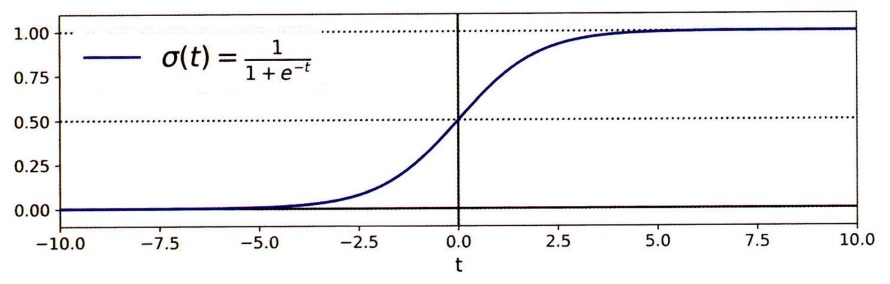

- $t<0$이면 $𝝈(t)<0.5$ 이므로 로지스틱 회귀 모델은 $𝜽^T𝐱$ 가 음수일 때, 음성 클래스인 레이블 0이라고 예측한다.
- $t\geq 0.5$이면 $𝝈(t)\geq 0.5$ 이므로 로지스틱 회귀 모델은 $𝜽^T𝐱$ 가 양수일 때, 양성 클래스인 레이블 1이라고 예측한다.

### 4.6.2 훈련과 비용 함수
로지스틱 회귀 모델 훈련의 목적은 양성 샘플(y=1)에 대해서는 높은 확률을 추정하고, 음성 샘플(y=0)에 대해서는 낮은 확률을 추정하는 파라미터 벡터 𝜽를 찾는 것이다. 이러한 아이디어는 하나의 훈련 샘플 𝐱에 대해 나타낸 비용함수에 드러나 있다.

> ***하나의 훈련 샘플에 대한 비용함수***

$c(𝜽) =
\begin{cases}
-\log(\hat p), &\text {y=1} \\
-\log(1-\hat p), &\text {y=0}
\end{cases}$

양성 샘플(y=1)의 경우, 비용함수는 t가 0에 가까워지면 -log(t)가 매우 커지므로 타당하다. 따라서 모델이 양성 샘플을 0에 가까운 확률로 추정하면 비용이 크게 증가한다. 반면 t가 1에 가까우면 -log(t)는 0에 가까워진다.

음성 샘플(y=1)의 경우, 비용함수는 t가 1에 가까워지면 -log(1-t)가 매우 커지므로 타당하다. 따라서 모델이 음성 샘플을 1에 가까운 확률로 추정하면 비용이 증가한다. 반면 t가 0에 가까우면 -log(1-t)는 0에 가까워진다.

따라서 기대한대로 음성 샘플의 확률을 0에 가깝게 추정하거나, 양성 샘플의 확률을 1에 가깝게 추정하면 비용은 0에 가까워질 것이다.

전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 평균한 것으로, 로그 손실이라고 부른다.

> ***로지스틱 회귀의 비용 함수(로그 손실)***

$J(\theta)=-\frac{1}{m}\sum_{i=1}^m [y^{(i)}\log(\hat p^{(i)})+(1-y^{(i)})\log(1-\hat p^{(i)})]$

이 비용 함수의 최솟값을 계산하는 방정식은 존재하지 않으나, 볼록 함수이므로 경사 하강법이 전역 최솟값을 찾는 것을 보장한다.

### 4.6.3 결정 경계
로지스틱 회귀를 설명하기 위해 붓꽃 데이터셋을 사용한다. 이 데이터셋은 3개의 품종(Setosa, Versicolor, Verginica)에 속하는 150개의 꽃잎(Petal)과 꽃받침(Sepal)의 너비와 길이를 담고 있다.

꽃잎의 너비를 기반으로 Verginica 종을 감지하는 분류기를 만든다. 먼저 데이터를 로드하고 사이킷런의 `LogisticRegression`을 이용하여 로지스틱 회귀 모델을 훈련시킨다.

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
X = iris['data'][:, 3:]
y = (iris['target']==2).astype(np.int)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

꽃잎의 너비가 0~3cm인 꽃을 새로운 데이터로 만들고, 이 데이터셋 대해 모델의 추정 확률을 계산한다.

로지스틱 회귀 모델은 `predict_proba()`를 적용하면 샘플이 **각 클래스에 속할 것이라고 예측한 확률**을 반환한다.

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

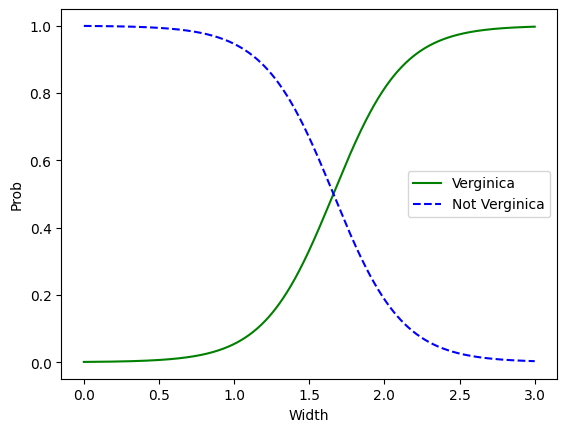

In [ ]:
plt.plot(X_new, y_proba[:, 1], 'g-', label='Verginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Verginica')
plt.ylabel('Prob')
plt.xlabel('Width')
plt.legend()
plt.show()

초록색의 Verginica의 꽃잎 너비는 1.4cm 이상에서 분포하며, 다른 붓꽃은 일반적으로 너비가 더 작은 0.1~1.7cm에 분포한다. 이때 꽃잎 너비가 2cm 이상인 꽃은 분류기가 Verginica라고 강하게 확신하는 반면, 1cm 아래면 Verginica가 아니라고 강하게 확신한다.

이때 로지스틱 회귀 모델에 `predict_proba()`가 아닌 `predict()`를 적용하면, **가장 확률이 높은 클래스 값**을 결과로 반환한다.

따라서 양쪽의 확률이 똑같이 50%가 되는 1.6cm 근처에서 **결정 경계**가 만들어진다. 꽃잎 너비가 1.6cm보다 크면 Verginica로 분류하고, 1.6cm보다 작으면 Verginica가 아니라고 예측할 것이다.

즉 1.7cm의 샘플에 대해서는 클래스 1을, 1.5cm의 샘플에 대해서는 클래스 0을 할당한다.

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

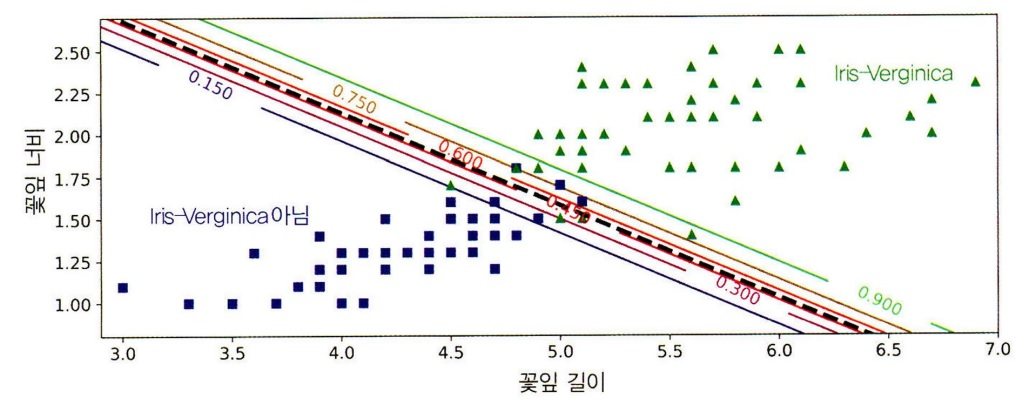

다음 그림은 같은 데이터셋을 꽃잎 너비와 길이, 2가지 특성으로 보여준다.

로지스틱 회귀 분류기는 훈련이 끝나면 이 2가지 특성을 기반으로 새로운 꽃이 Verginica인지 확률을 추정할 수 있다.

점선은 모델이 50% 확률을 추정하는 지점으로, 이 모델의 결정 경계이다. 결정 경계는 선형이다.

15%와 90%의 수평한 직선들은 모델이 특정 확률을 출력하는 포인트를 나타낸다. 모델은 맨 오른쪽 위의 직선을 넘어서 있는 꽃들을 90% 이상의 확률로 Verginica라고 판단할 것이다.

다른 선형 모델처럼 로지스틱 회귀 모델도 $l_1, l_2$ 페널티를 사용하여 규제할 수 있다. 사이킷런의 `LogisticRegreesion`은 **$l_2$ 페널티를 기본**으로 한다.

모델의 규제 강도를 조절하는 하이퍼파라미터는 다른 모델처럼 alpha가 아닌 그 역수에 해당하는 `C`이다. `C`가 높을수록 모델의 규제가 줄어든다.

### 4.6.4 소프트맥스 회귀
로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 **직접 다중 클래스**를 지원하도록 일반화될 수 있는데, 이를 **소프트맥스 회귀** 또는 **다항 로지스틱 회귀**라고 한다.

샘플 𝐱가 주어지면 먼저 소프트맥스 회귀 모델이 **각 클래스 k에 대한 점수** $s_k(𝐱)$를 계산하고, 그 점수에 **소프트맥스 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률을 추정**한다.

> ***클래스 k에 대한 소프트맥스 점수***

$s_k(𝐱)= (𝜽^{(k)})^T𝐱$

> ***소프트맥스 함수***

$\hat p_k = 𝝈(s((𝐱))_k = \frac{\exp(s_k(𝐱))}{ \sum_{j=1}^K\exp(s_j(𝐱))}$
- $K$: 클래스 수
- s(𝐱): 샘플 𝐱에 대한 각 클래스의 점수를 담은 벡터
- $𝝈(s((𝐱))_k$: 샘플 𝐱에 대한 각 클래스의 점수가 주어졌을 때, 이 샘플이 클래스 k에 속할 추정 확률

샘플 𝐱에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜서 클래스 k에 속할 확률 $\hat p_k$를 추정할 수 있다. 로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 **추정 확률이 가장 높은 클래스를 선택**한다.

소프트맥스 회귀 분류기는 한번에 하나의 클래스만 예측한다. 따라서 종류가 다른 붓꽃같이 상호 배타적인 클래스에서만 사용해야 하며, 하나의 사진에서 여러 사람의 얼굴을 인식하는데는 사용할 수 없다.

모델의 궁극적인 목표는 **타겟 클래스에 대해서는 높은 확률**을 추정하고, **다른 클래스에 대해서는 낮은 확률**을 추정하도록 만드는 것이다. 이를 위해 크로스 엔트로피 비용함수를 사용하기도 한다.

> ***크로스 엔트로피 비용함수***

$J(𝜣)=-\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^{(i)}\log(\hat p_k^{(i)})$
- $y_k^{(i)}$: i번째 샘플이 클래스 k에 속할 타겟 확률, 1 또는 0

크로스 엔트로피 비용함수를 최소화하는 것은 타겟 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 이 목적에 부합하다. 따라서 크로스 엔트로피는 추정된 클래스의 확률이 타겟 클래스에 얼마나 잘 맞는지 측정하는 용도로 종종 사용된다.

이제 소프트맥스 회귀를 사용하여 붓꽃 데이터셋을 3개의 클래스로 분류한다. 사이킷런의 `LogisticRegression`은 클래스가 둘 이상일 때 기본적으로 **일대다(OvA) 전략**을 사용한다.

그러나 **`multi_class` 매개변수를 `'multinomial'`**로 지정하면 소프트맥스 회귀를 사용할 수 있다. 그리고 **`solver` 매개변수에 `'lbfgs'`**와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다.

또한 기본적으로 하이퍼파라미터 `C`를 사용하여 조절할 수 있는 $l_2$ 규제가 적용된다.

In [ ]:
X = iris['data'][:, (2,3)] #꽃잎 길이, 너비
y = iris['target']

In [ ]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

만약 꽃잎의 길이가 5cm, 꽃잎의 너비가 2cm인 붓꽃에 대해 붓꽃의 품종을 알기 위해 소프트맥스 모델에 `predict()`를 적용하면 클래스를 예측할 수 있다.

또한 `predict_proba()`를 적용하면 각 클래스별 예측 확률을 구할 수 있다. 약 94.2%의 확률로 이 꽃이 클래스 2인 Vriginica에 속한다고 출력할 것이다.

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])